# CENG463 PA1

In this programming assignment, we want to walk you through the building blocks of natural language processing before the success of neural models. You will be working on text preprocessing, textual data representation methods such as bag-of-words, and traditional ML training pipelines.

You will use Python for this task. You can use libraries such as `pandas`, `nltk`, `scikit-learn` etc. for your implementations, or implement your own functions. However, you are expected to analyse and reason about your implementation and results. 

### IMPORTANT NOTE

Do not move or delete the given cells, only add cells inbetween the questions for your answers.

In [27]:
# UPDATE THIS CELL TO INSTALL NEEDED LIBRARIES.
# MAKE SURE TO ADD EVERYTHING THAT NEEDS TO BE INSTALLED IN THIS CELL!

# we will use pip to install packages - you can add others below
!pip install pandas
!pip install nltk
!pip install scikit-learn
!pip install matplotlib

# and import them here - you can add others below
import pandas as pd
import re
import matplotlib.pyplot as plt;
import nltk
from nltk.lm import Laplace
from nltk.lm.preprocessing import padded_everygram_pipeline, pad_both_ends, everygrams
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('wordnet')


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yarkinozcan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yarkinozcan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Q1 - Special token extraction with regular expressions (10 points)

Load the `old_tweets.csv` file shared with you. Use regular expressions to capture the following:

- usernames (starting with '@', followed by at least 4, at most 15 alphanumeric characters and '_')
- hashtags (starting with '#' followed by any number of alphanumeric characters)
- numbers (different number notations may be captured, such as "1", ".004", "3:00" and "100,323")
- emojis 

#### Notes and tips

- First tokenizing each tweet by space may be a better approach than using a library tokenizer.
- You can use the [re](https://docs.python.org/3/library/re.html) module to implement your solutions.
- Do not forget to add comments to your code.

In [28]:
tweets = pd.read_csv('data/old_tweets.csv')
usernames = []
hashtags = []
numbers = []
emojis = []

tweets

,Tweet
0,Gm and have a #Tuesday!
1,@realDonaldTrump But you have a lot of time fo...
2,I graduated yesterday and already had 8 family...
3,@jaimitoelcrack7 Seriously...I've been sitting...
4,Whether my glass is half empty or its half ful...
...,...
932,Premier League Teams should fear next seasons ...
933,how are you my love? @Hashtag_DonJon love youu...
934,"'She is the clothed with strength and dignity,..."
935,My dads big day is only less than 2 weeks away...


In [29]:
# print(tweets.columns) print this to observe the column name (Tweet)
#temp = [] # FOR debugging
for tweet in tweets['Tweet']: # For each individual tweet
    tweetSplitted = tweet.split() # Tokenizing each tweet by space
    #print(tweetSplitted) # FOR debugging
    for word in tweetSplitted: # Look for each word
        # USERNAME
        if re.search(r"@(\w{4,15})", word): # If there is a match for usernames append the username to the usernames list
            # The logic is that if the word contains @ character followed 
            usernames = usernames + (re.findall(r"@(\w{4,15})", word)) # We are using + instead of append because findall returns a list not a string
            #temp += (re.findall(r"@(\w{4,15})", word)) # FOR debugging
        # HASHTAG
        if re.search(r"#(\w+)", word): 
            # The logic here is that find all patterns that start with hashtag followed by any number of words alphanumeric words (NOT INCLUDING ZERO)
            hashtags = hashtags + (re.findall(r"#(\w+)", word))
            #temp += (re.findall(r"#(\w+)", word)) # FOR debugging
        # NUMBERS (NOT %100 SURE)
        if re.search(r"^(?:\.\d+|(?:\d+|\d+[\.,]\d+)|(?:\d+:\d+)|(?:\d+(?:\.\d+)?[eE][-+]\d+)|(?:\d+(?:\.\d+)?%))$", word): 
            # Here I only tried to find numerical expressions, including the examples given in the question and some that I could think of
            # I combined different number notations with OR
            numbers = numbers + (re.findall(r"^(?:\.\d+|(?:\d+|\d+[\.,]\d+)|(?:\d+:\d+)|(?:\d+(?:\.\d+)?[eE][-+]\d+)|(?:\d+(?:\.\d+)?%))$", word)) 
            #temp += (re.findall(r"^(?:\.\d+|(?:\d+|\d+[\.,]\d+)|(?:\d+:\d+)|(?:\d+(?:\.\d+)?[eE][-+]\d+)|(?:\d+(?:\.\d+)?%))$", word)) # FOR debugging
        # EMOJIS
        # Here the logic is that if we exclude every character other thn emojis, then we will have only emojis left.
        pattern_to_remove = r'[\w\s!"#$%&\'()*+,./:;<=>?@\[\\\]\^`{|}~-]+' # These characters are the all possible ones I could think of but there might be some missing
        # Use re.sub to replace all matched characters with an empty string
        word = re.sub(pattern_to_remove, "", word)
        if word:
            emojis.append(word) # Here I did not use += because it made some emojis change color/state for some reason
            #temp.append(word) # FOR debugging
    #print(temp) # FOR debugging
    #temp = [] # FOR debugging
    

In [30]:
print(sorted(usernames))
print(sorted(hashtags))
print(sorted(numbers))
print(sorted(emojis))

['071304Nathan', '143percentspeed', '16_vica', '2minbeachclean', '3gerardpique', 'ABCTV', 'ARTSEDNC', 'AWilliamson54', 'ActionBronson', 'ActuallyNPH', 'AdamBaldwin', 'AdamZHerman', 'Afi_licious', 'Agrivisor', 'Agrivisor', 'AishaRuby85', 'AlanLCross', 'Alanis', 'AlaskaAir', 'AlbinomiteMM4', 'AldridgeSec', 'AlistairBurtUK', 'AlmightyTeemo97', 'AndreSavelio', 'AndrewGoldman_I', 'AnewPerspective', 'AnthonyMuraco', 'AppleSupport', 'AquaRumi9', 'ArriFaun', 'Arron_banks', 'Arsenal', 'Asli_Jacqueline', 'AuSenate', 'AvrilLavigne', 'BBCBreakfast', 'BBCBreaking', 'BBCNews', 'BCFC_Community', 'BLUpfront', 'BWANA86a', 'Bemannn', 'BethRigby', 'BethellMarilyn', 'BettyBowers', 'Bienvenuebrexit', 'BloodMoonSaint', 'Bob_Lawblaw', 'BollyBigBolt', 'Bombardier', 'BradMossEsq', 'BrokenSStudios', 'BroxtonDaniel', 'BryanHoch', 'BugsySeigal', 'ButUCanCallMeZ', 'CBSNews', 'CJamesFelts', 'COFFEECOWal', 'CPC_HQ', 'CakedaddyINTL', 'CamilaLolie97', 'Camila_Cabello', 'CaptainsLog2017', 'CaxtonSupport', 'ChadHoy', 'C

## Q2 - Ngrams and perplexity (40 points)

For this task, you will use the `user_reviews_train.csv` file as a corpus to train N-gram language models for N=1 to N=20. Then you will calculate and plot the following:

- Perplexity scores of the trained N-gram LMs for the first review in `user_reviews_test.csv`
- Perplexity scores of the trained N-gram LMs for `trip_review.txt`, which is a "domain-shift" for our LM.

How does our small model perform? Explain the plots and discuss your findings.

#### Notes and tips

- One approach may be using the [`nltk` LM interface](https://www.nltk.org/api/nltk.lm.api.html#module-nltk.lm.api) to implement the language model and calculate perplexity scores.
- You may follow other approaches, but make sure to explain your work in the discussion and by adding comments in your code.

In [31]:
# Q2 - implementation
# you can add cells below if needed

# used for plots, fill them in accordingly
perplexities_user_review = []
perplexities_trip_review = []

trainData = pd.read_csv('data/user_review_train.csv') # First read the data, our sentences lies int he 'review' column

# Before training, we need to normalize and tokenize our sentences
tokenizedSentencesTrain = [] # Create the normalized sentences list
for sentence in trainData['review']:
    sentence_lowercase = sentence.lower() # Here I just used a simple lower case normalization method
    # Here I am tokenizing the normalized the sentence (just a simple whitespace normalization)
    tokenizedSentencesTrain.append(sentence_lowercase.split())

# A. User Review (In-Domain)
testDataUser = pd.read_csv('data/user_review_test.csv') # Read the User domain test
# Get only the first review as a string (mentioned as the question) 
first_review_sentence = testDataUser['review'][0] # first_review_sentence is just a string (not tokenized or normalized)

# Tokenize that single string into a list of words
first_review_normalized = first_review_sentence.lower() # Again just a simple normalization
first_review_tokenized = first_review_normalized.split() # Again just a simple tokanization by whitespace

# B. Trip Review (Out-Domain)
f = open("data/trip_review.txt") # I have used open instead of read_csv here since trip_review is a txt file
testDataTrip = f.read() # Here testDataTrip is just a string (not tokenized or normalized)

testDataTrip_lowercase = testDataTrip.lower() # Again just a simple normalization
tokenizedSentencesTestTrip = testDataTrip_lowercase.split() # Again just a simple tokanization by whitespace

for N in range(1, 21): # N in the range from 1 to 20 (included)
    # I have used padded_everygram_pipeline here since we are working with multiple sentences and we need vocabulary info
    # Also with this, we train the model from N=1 upto N=(whichever value we are at)
    train_data, vocab = padded_everygram_pipeline(N, tokenizedSentencesTrain) # Adding padding for both sides ((n-1) many <s> and 1 </s>)
    
    # Train Laplace-smoothed N-gram model
    model = Laplace(N) # Here I am adding laplace smoothing in order to avoid zero probabilities
    model.fit(train_data, vocab) # Actual training

    # I have used pad_both_ends here since we are only working with 1 sentence
    padded_user_review = list(pad_both_ends(first_review_tokenized, N)) # Adding padding for both sides ((n-1) many <s> and 1 </s>)
    test_ngrams_user = list(ngrams(padded_user_review, N)) # Adding padding for both sides ((n-1) many <s> and 1 </s>)

    # I have used pad_both_ends here since we are only working with 1 sentence
    padded_trip_review = list(pad_both_ends(tokenizedSentencesTestTrip, N)) # Adding padding for both sides ((n-1) many <s> and 1 </s>)
    test_ngrams_trip = list(ngrams(padded_trip_review, N)) # Adding padding for both sides ((n-1) many <s> and 1 </s>)

    # Compute perplexity on the N-gram sets
    ppl_user = model.perplexity(test_ngrams_user)
    ppl_trip = model.perplexity(test_ngrams_trip)

    perplexities_user_review.append(ppl_user)
    perplexities_trip_review.append(ppl_trip)

    # I added this in order to track at which state the training is at so that I know when to run the next cell
    print(f"N={N:2d}: user_review={ppl_user:.2f}, trip_review={ppl_trip:.2f}")

    

N= 1: user_review=1046.42, trip_review=2677.12
N= 2: user_review=3573.77, trip_review=10137.87
N= 3: user_review=10020.90, trip_review=22451.22
N= 4: user_review=11847.08, trip_review=25627.98
N= 5: user_review=12007.35, trip_review=25639.88
N= 6: user_review=12044.39, trip_review=25652.20
N= 7: user_review=12051.84, trip_review=25664.25
N= 8: user_review=12059.21, trip_review=25676.02
N= 9: user_review=12066.49, trip_review=25687.53
N=10: user_review=12073.70, trip_review=25698.79
N=11: user_review=12080.82, trip_review=25709.80
N=12: user_review=12087.86, trip_review=25720.58
N=13: user_review=12094.83, trip_review=25731.12
N=14: user_review=12101.72, trip_review=25741.44
N=15: user_review=12108.54, trip_review=25751.55
N=16: user_review=12115.28, trip_review=25761.45
N=17: user_review=12121.95, trip_review=25771.14
N=18: user_review=12128.55, trip_review=25780.64
N=19: user_review=12135.08, trip_review=25789.95
N=20: user_review=12141.54, trip_review=25799.07


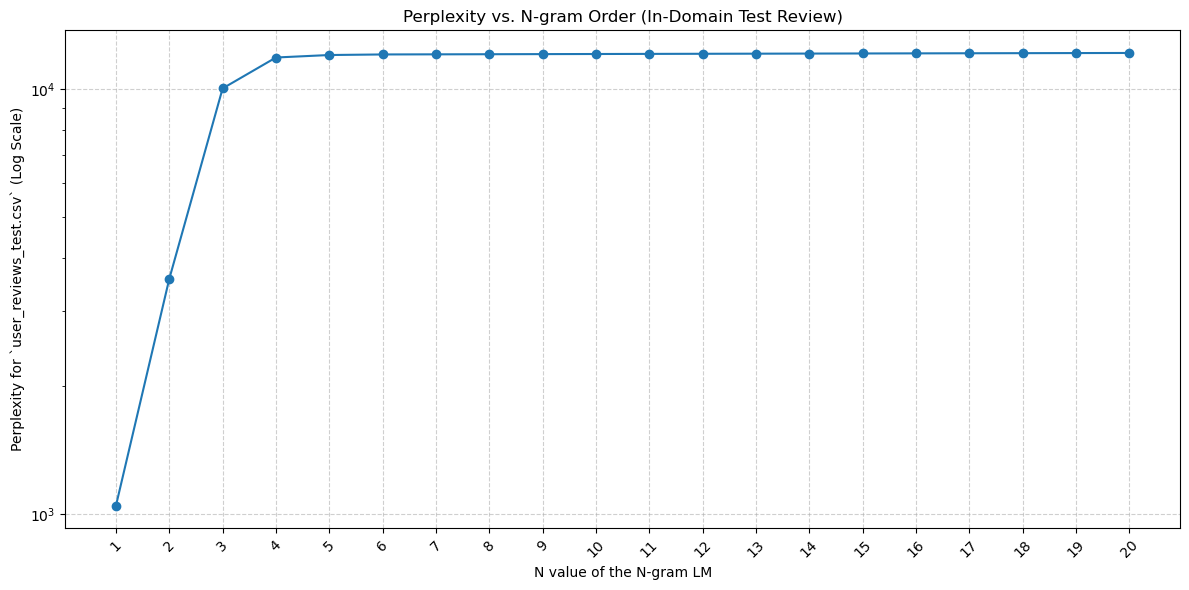

In [32]:
# Q2 - plot for `user_reviews_test.csv`
n_values = list(range(1, 21))
plt.figure(figsize=(12, 6))
plt.plot(n_values, perplexities_user_review, marker='o', linestyle='-')
plt.title("Perplexity vs. N-gram Order (In-Domain Test Review)")
plt.xlabel("N value of the N-gram LM")
plt.ylabel("Perplexity for `user_reviews_test.csv` (Log Scale)")
plt.xticks(n_values, rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.yscale('log') 
plt.tight_layout()
plt.show()


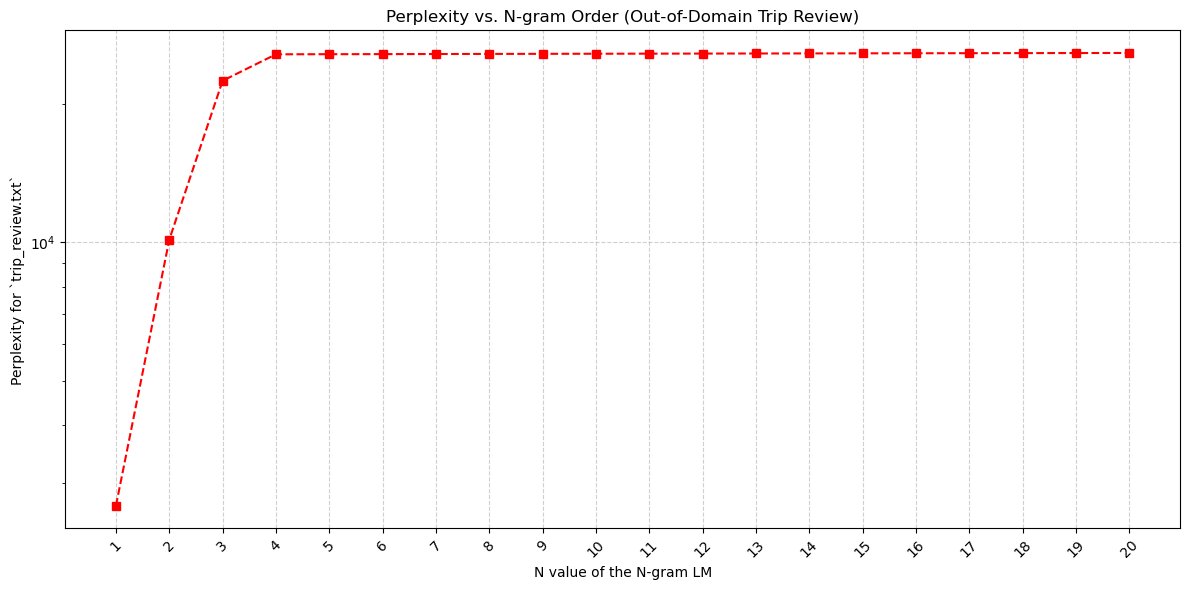

In [33]:
# Q2 - plot for `trip_review.txt`
plt.figure(figsize=(12, 6))
plt.plot(n_values, perplexities_trip_review, marker='s', linestyle='--', color='red')
plt.title("Perplexity vs. N-gram Order (Out-of-Domain Trip Review)")
plt.xlabel("N value of the N-gram LM")
plt.ylabel("Perplexity for `trip_review.txt`")
plt.xticks(n_values, rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.yscale('log') 
plt.tight_layout()
plt.show()


### Q2 - Discussion

1 - The effect of value N

➤ (a) Unigram (N=1) starts lowest
	•	For user_review: ~1046
	•	For trip_review: ~2677
That’s normal: a unigram model doesn’t capture any word dependencies, so it’s simple and smooth, giving small perplexity. So since we are not checking if a word exists on the training set (not checking the previous words). We mostly find a match so we get a lower perplexity

➤ (b) As N increases to 2–3–4, perplexity rises sharply
	•	By N=3, perplexity jumps to ~10 000 (user_review) and ~22 000 (trip_review).
This happens because higher-order models need more context — and if your training data is small, many 3- or 4-grams never appear in training. 
Since we are checking if there is a exact match between the previous n-1 words, the likelyhood of getting a match gets lower, hence increasing the perplexity.

➤ (c) After N≈5, perplexity saturates

From N = 5 to 20:
	•	user_review goes from 12007 → 12141
	•	trip_review goes from 25639 → 25799
This means:

The model has effectively reached its limit — adding more context (N>5) doesn’t improve prediction because data sparsity dominates. In simpler words, we mostly do not find any matches with N=5 hence increasing N even further does not have many implications since we did not have many matches previously.

So the model can’t learn reliable 10-grams, 20-grams, etc., since such sequences rarely repeat.

2 - Domain Shift 

➤ With user review test set, the perplexity range is 1 000 → 12 000. However, with trip review test set, the perplexity range is 2 600 → 25 000. This shows how domain shift can increase the performance of the model. When we test with same domain as the training set, we get a much lower perplexity (better performance) than the test set with a different domain.


## Q3 - Classifying user reviews using Bag-of-Words (50 points)

For this final task, you will use the `user_reviews_train.csv` and `user_reviews_test.csv` files to implement a binary classifier with Bag-of-Words representation. 

The given dataset includes user reviews and corresponding `sentiment` value for each review, either `1` meaning positive or `0` meaning negative. With this dataset, you are expected to implement a classifier that decides whether a given user review is positive or negative. 

### Part A - Analysis

In this part, you will analyse the training set given in the `user_reviews_train.csv` file to answer these questions:

- How many instances are there for each class?
- What is the minimum, maximum, and average character length of the reviews?
- Does the average length of a review depend heavily on the class label?
- Any other statistics you can report with minimal processing?

You can use tables or draw plots to show your analyses.

### Part B - Implementation

The goal of this part is not to get the highest possible performance, but to see the effect of changing the text representation. Hence, you will train six models: 

- `lighlty_preprocessed_most_15`
- `lighlty_preprocessed_most_100`
- `fully_preprocessed_most_15`
- `fully_preprocessed_most_100`
- `fully_preprocessed_most_500`
- `fully_preprocessed_least_15`

For the `lighlty_preprocessed_most_N` models, the preprocessing steps are as follows:

- Tokenize the reviews by separating from whitespaces.
- Lowercase all tokens for normalization.
- Order all unique tokens by frequency, take the most frequently used N.
- Use these N words as the corpus for Bag-of-Words representation.

For the `fully_preprocessed_most_N` models, the preprocessing steps are as follows:

- Tokenize the reviews by using `word_tokenize()` from `nltk.tokenize`.
- Lowercase all tokens for normalization.
- Remove stopwords by using `stopwords` from `nltk.corpus`.
- Apply lematization to tokens by using `WordNetLemmatizer` from `nltk.stem`. 
- Order all unique tokens by frequency, take the most frequently used N.
- Use these N words as the corpus for Bag-of-Words representation.

For the `fully_preprocessed_least_15` model, the preprocessing steps are as follows:

- Tokenize the reviews by using `word_tokenize()` from `nltk.tokenize`.
- Lowercase all tokens for normalization.
- Remove stopwords by using `stopwords` from `nltk.corpus`.
- Apply lematization to tokens by using `WordNetLemmatizer` from `nltk.stem`. 
- Order all unique tokens by frequency, take the **LEAST** frequently used 15.
- Use these 15 words as the corpus for Bag-of-Words representation.

For all six models, after preprocessing, you should implement the model obeying the following:

- You must to use Bag-of-Words representation to represent each data instance. You can use `CountVectorizer` from `scikit-learn` or any other library available to implement this.
- You should select a classification method from the following set of classifiers: `[Naive Bayes, Support Vector Machine, Logistic Regression, Random Forest]`. You can use `scikit-learn`, `nltk`, or any other library for the classifier implementations. 
- You should **not** use the test set `user_reviews_test.csv` during your training process. You should use `user_reviews_train.csv` only.
- You may add a validation step in your training process. To do this, you can further split the `user_reviews_train.csv` data and apply k-fold cross validation.
- You should analyse the performance of your models with four metrics on the test set `user_reviews_test.csv`: accuracy, precision, recall and F1-score.

Do not forget to add any additional libraries you used to the `pip` installations.

### Part C - Performance discussion

In this part, you will report the performance of your models with the four metrics mentioned in Part A. You should discuss your findings. Which model performed better, and why is that the case? Is it the expected result, or a surprising one? Discuss the results in detail. For the models with a corpus of length 15, make sure to add the corpus to your discussion.


Class distribution:
Number of Positive Sentiments: 6963
Number of Negative Sentiments: 7712


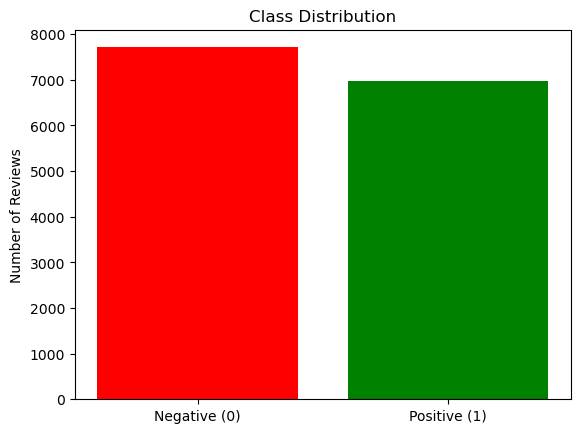

Character length stats:
  Minimum: 1
  Maximum: 3810
  Average: 113.12
Average char length for each class:
Negative Reviews: 154.96
Positive Reviews: 66.79


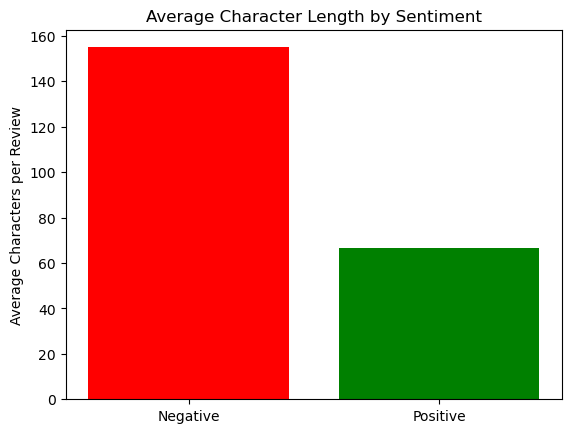

Word Count stats:
  Minimum: 1
  Maximum: 722
  Average: 19.77
Average word_count for each class:
Negative Reviews: 27.20
Positive Reviews: 11.55


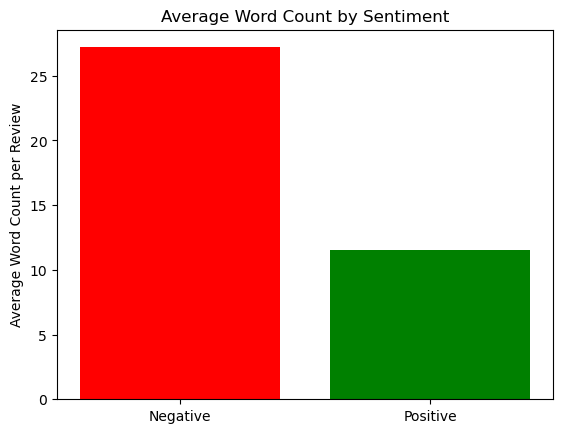

In [34]:
# Q3 PART A - Analysis

trainData = pd.read_csv("data/user_review_train.csv") # Read the training data

# print(trainData) # Print the training data to see the general format

positive_sentiment = 0 # Number of positive reviews
negative_sentiment = 0 # Number of negative reviews

for sentiment in trainData['sentiment']: # Check for each review
    if(sentiment):
        positive_sentiment += 1 # If positive sentiment increase positive_sentiment by 1
    else:
        negative_sentiment += 1 # If negative sentiment increase negative_sentiment by 1
        
print("Class distribution:")
print("Number of Positive Sentiments:", positive_sentiment) # For debugging purposes
print("Number of Negative Sentiments:", negative_sentiment) # For debugging purposes

# Plot the graph for sentiment class count
plt.bar(['Negative (0)', 'Positive (1)'], [negative_sentiment, positive_sentiment] , color=['red', 'green']) 
plt.title("Class Distribution")
plt.ylabel("Number of Reviews")
plt.show()

# Here instead of writing plane for loops to calculate min, max and mean, I am utilizing the pandas' .min(), .max() and .mean() methods
# Instead of creating a new array, create a new dimension on the existing data and append char lenght for each review
trainData['char_length'] = trainData['review'].astype(str).apply(len) 

min_len = trainData['char_length'].min()
max_len = trainData['char_length'].max()
avg_len = trainData['char_length'].mean()

print(f"Character length stats:")
print(f"  Minimum: {min_len}") # The minimum char lenght across all reviews
print(f"  Maximum: {max_len}") # The maximum char lenght across all reviews
print(f"  Average: {avg_len:.2f}") # The average number of char lenght across all reviews

# First group by 'sentiment' value (which is either 1 or 0), then for each class calculate the mean char length value
avg_len_by_class = trainData.groupby('sentiment')['char_length'].mean() # Average lenght for each class (positive and negative)
print("Average char length for each class:")
print(f"Negative Reviews: {avg_len_by_class.loc[0]:.2f}")
print(f"Positive Reviews: {avg_len_by_class.loc[1]:.2f}") 

# Plot the graph for Average character lenght for each class
plt.bar(['Negative', 'Positive'], avg_len_by_class.values, color=['red', 'green'])
plt.title("Average Character Length by Sentiment")
plt.ylabel("Average Characters per Review")
plt.show()

# Another analysis metric I could think of was word count
trainData['word_count'] = trainData['review'].astype(str).apply(lambda x: len(x.split()))

min_len = trainData['word_count'].min()
max_len = trainData['word_count'].max()
avg_len = trainData['word_count'].mean()

print(f"Word Count stats:")
print(f"  Minimum: {min_len}") # The minimum word countacross all reviews
print(f"  Maximum: {max_len}") # The maximum word count across all reviews
print(f"  Average: {avg_len:.2f}") # The average number of word count across all reviews

# First group by 'sentiment' value (which is either 1 or 0), then for each class calculate the mean word count value
word_count_by_class = trainData.groupby('sentiment')['word_count'].mean() # Average word count for each class (positive and negative)
print("Average word_count for each class:")
print(f"Negative Reviews: {word_count_by_class.loc[0]:.2f}")
print(f"Positive Reviews: {word_count_by_class.loc[1]:.2f}") 

# Plot the graph for Average word count for each class
plt.bar(['Negative', 'Positive'], word_count_by_class.values, color=['red', 'green'])
plt.title("Average Word Count by Sentiment")
plt.ylabel("Average Word Count per Review")
plt.show()


Training Lightly Processed (Most 15)
Accuracy : 0.7499
Precision: 0.7552
Recall   : 0.8359
F1-Score : 0.7935
Training Lightly Processed (Most 100)
Accuracy : 0.8328
Precision: 0.8503
Recall   : 0.8609
F1-Score : 0.8555
Training Fully Processed (Most 15)
Accuracy : 0.6579
Precision: 0.6809
Recall   : 0.7622
F1-Score : 0.7193
Training Fully Processed (Most 100)
Accuracy : 0.8107
Precision: 0.8263
Recall   : 0.8494
F1-Score : 0.8377
Training Fully Processed (Most 500)
Accuracy : 0.8519
Precision: 0.8689
Recall   : 0.8744
F1-Score : 0.8716
Training Fully Processed (Least 15)
Accuracy : 0.4263
Precision: 1.0000
Recall   : 0.0021
F1-Score : 0.0041


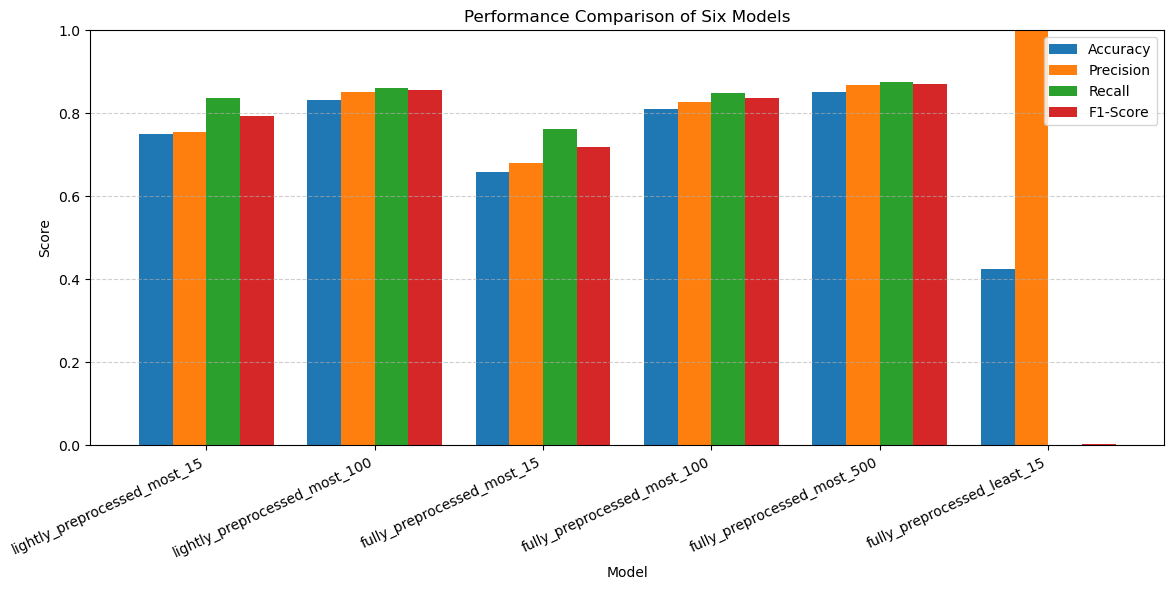

In [35]:
# Q3 PART B - Implementation

# First get the training and test data
trainData = pd.read_csv("data/user_review_train.csv")
testData  = pd.read_csv("data/user_review_test.csv")

# PART 1: Lightly Processed Most Model Training
tokenized_light = []
for review in trainData['review']:
    tokens = str(review).lower().split() # Tokenizing by whitespace splitting and normalizing by lowercasing the sentences
    tokenized_light.append(tokens) # Adding each token (sentences) into the bag

# Flatten tokenized sentences into a single list of words
flattened_light = []  # Create an empty list to store all words

for sentence in tokenized_light: # Go through each tokenized sentence
    for word in sentence: # For each word inside that sentence
        flattened_light.append(word) # Add the word to the flat list

# print(flattened_light) # For debugging purposes

freq_light = Counter(flattened_light) # Count word frequencies across the entire corpus 

# print(freq_light) # For debugging purposes, it seems that Counter method actually automatically sorts it in decreasing order

most_common_15 = freq_light.most_common(15) # Get the 15 most common (word, count) pairs
most_common_100 = freq_light.most_common(100) # Get the 100 most common (word, count) pairs

vocab_light_15 = []
for word, count in most_common_15:
    vocab_light_15.append(word) # Extract only the words (ignore counts)

vocab_light_100 = []
for word, count in most_common_100:
    vocab_light_100.append(word) # Extract only the words (ignore counts)

# print(vocab_light_15) # For debugging purposes (there are stop words like 'a' since we did not remove them)

# PART 2: Fully Processed Most Model Training
stop_words = set(stopwords.words('english')) # Get the stop words in english 
lemmatizer = WordNetLemmatizer() # To apply lemmatization

# Tokenization, stopword removal, and lemmatization
tokenized_full = [] # Array to keep lemmatized non-stop words across all sentences
for review in trainData['review']:
    tokens = word_tokenize(str(review).lower()) # Tokenizing with word_tokenize and normalizing with lowercasing
    cleaned = [] # Array to keep lemmatized non-stop words across 1 sentence
    for t in tokens: 
        if t not in stop_words: # Remove stop words
            lemma = lemmatizer.lemmatize(t) # Apply lemmatization to tokens using WordNetLemmatizer
            cleaned.append(lemma)
    # print(cleaned) # For debugging purposes
    tokenized_full.append(cleaned)

# Flatten tokenized sentences into a single list
flattened_full = []
for sentence in tokenized_full:
    for word in sentence:
        flattened_full.append(word)

# Count word frequencies
freq_full = Counter(flattened_full) # Again this Counter method gives the tokens in descending order

# Build vocabularies
most_common_15_full  = freq_full.most_common(15)
most_common_100_full = freq_full.most_common(100)
most_common_500_full = freq_full.most_common(500)

# It seems that there is no least_common method in collections module
# So I have to first reverse the alrady descending list so that I can get ascending list and get the first 15 elements
# Get all (word, count) pairs sorted from most->least
all_pairs_desc = freq_full.most_common()

# Reverse to get least->most
# The weird thing here is that there A LOT of tokens with frequency = 1 (deu to Zipf’s Law) but we only get the 15 words.
all_pairs_asc = list(reversed(all_pairs_desc)) # This is in ascending order (tested it via printing)


# Take the first 15 = least frequent 15
least_common_15_full = all_pairs_asc[:15]

# Extract only words for each vocab
vocab_full_15 = []
for word, count in most_common_15_full:
    vocab_full_15.append(word)

vocab_full_100 = []
for word, count in most_common_100_full:
    vocab_full_100.append(word)

vocab_full_500 = []
for word, count in most_common_500_full:
    vocab_full_500.append(word)

vocab_full_least_15 = []
for word, count in least_common_15_full:
    vocab_full_least_15.append(word)

# Prepare train and test text + labels
train_texts = trainData['review']
train_labels = trainData['sentiment']
test_texts  = testData['review']
test_labels = testData['sentiment']

# Convert token lists back to strings for CountVectorizer
# (Each vocab list will serve as "vocabulary" argument)
def evaluate_model(vocab_list, model_name):
    print(f"Training {model_name}") # Added this to track where the training is at

    # Bag-of-Words representation
    # The 'vocabulary' parameter limits the features to our selected word list
    vectorizer = CountVectorizer(vocabulary=vocab_list)
    X_train = vectorizer.fit_transform(train_texts)
    X_test  = vectorizer.transform(test_texts)

    # Classifier (Logistic Regression)
    # max_iter=1000 ensures convergence, and 'liblinear' works well for small datasets
    clf = LogisticRegression(max_iter=1000, solver='liblinear')
    clf.fit(X_train, train_labels) # Train the model using labeled training data

    # Predict sentiment labels for the test data
    y_pred = clf.predict(X_test)

    # Evaluation metrics
    acc  = accuracy_score(test_labels, y_pred)
    prec = precision_score(test_labels, y_pred)
    rec  = recall_score(test_labels, y_pred)
    f1   = f1_score(test_labels, y_pred)

    # Compute accuracy, precision, recall, and F1-score using sklearn metrics
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")

    return acc, prec, rec, f1


# Evaluate all six models
results = {}

# lightly_preprocessed_most_15
results["lightly_preprocessed_most_15"] = evaluate_model(vocab_light_15, "Lightly Processed (Most 15)")

# lightly_preprocessed_most_100
results["lightly_preprocessed_most_100"] = evaluate_model(vocab_light_100, "Lightly Processed (Most 100)")

# fully_preprocessed_most_15
results["fully_preprocessed_most_15"] = evaluate_model(vocab_full_15, "Fully Processed (Most 15)")

# fully_preprocessed_most_100
results["fully_preprocessed_most_100"] = evaluate_model(vocab_full_100, "Fully Processed (Most 100)")

# fully_preprocessed_most_500
results["fully_preprocessed_most_500"] = evaluate_model(vocab_full_500, "Fully Processed (Most 500)")

# fully_preprocessed_least_15
results["fully_preprocessed_least_15"] = evaluate_model(vocab_full_least_15, "Fully Processed (Least 15)")

# Extract model names and metric values
model_names = list(results.keys())
acc_values  = [results[m][0] for m in model_names]
prec_values = [results[m][1] for m in model_names]
rec_values  = [results[m][2] for m in model_names]
f1_values   = [results[m][3] for m in model_names]

# Number of models
num_models = len(model_names)

# Bar width and positions (just using simple math)
bar_width = 0.2
x_positions = list(range(num_models))

# Create offset positions for each metric
x_acc  = [x - 1.5 * bar_width for x in x_positions]
x_prec = [x - 0.5 * bar_width for x in x_positions]
x_rec  = [x + 0.5 * bar_width for x in x_positions]
x_f1   = [x + 1.5 * bar_width for x in x_positions]

# Plot the grouped bars
plt.figure(figsize=(12, 6))
plt.bar(x_acc,  acc_values,  width=bar_width, label='Accuracy')
plt.bar(x_prec, prec_values, width=bar_width, label='Precision')
plt.bar(x_rec,  rec_values,  width=bar_width, label='Recall')
plt.bar(x_f1,   f1_values,   width=bar_width, label='F1-Score')

# Add labels and formatting
plt.title("Performance Comparison of Six Models")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(x_positions, model_names, rotation=25, ha='right')
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Q3 PART C - Performance discussion
In this part, six different sentiment classification models were trained and evaluated using various preprocessing levels and vocabulary sizes.  
The models were assessed using four metrics: **accuracy**, **precision**, **recall**, and **F1-score**.

### Results Summary

| Model | Accuracy | Precision | Recall | F1-score |
|--------|-----------|-----------|---------|-----------|
| Lightly Preprocessed (Most 15) | 0.7499 | 0.7552 | 0.8359 | 0.7935 |
| Lightly Preprocessed (Most 100) | 0.8328 | 0.8503 | 0.8609 | 0.8555 |
| Fully Preprocessed (Most 15) | 0.6579 | 0.6809 | 0.7622 | 0.7193 |
| Fully Preprocessed (Most 100) | 0.8107 | 0.8263 | 0.8494 | 0.8377 |
| **Fully Preprocessed (Most 500)** | **0.8519** | **0.8689** | **0.8744** | **0.8716** |
| Fully Preprocessed (Least 15) | 0.4263 | 1.0000 | 0.0021 | 0.0041 |

---

### 1. Effect of Vocabulary Size

As expected, models using a **larger vocabulary** performed better overall.  
The **Fully Preprocessed (Most 500)** model achieved the highest scores across all metrics, reaching about **85% accuracy** and an **F1-score of 0.87**.  

This improvement is intuitive: as the number of unique words (features) increases, the model gains more information to distinguish between positive and negative reviews.  
Smaller vocabularies (such as 15 or 100 words) capture only the most frequent patterns and often fail to represent nuanced expressions of sentiment.   
However, it is important that even though the word number decreases from 500 to 15, the performance of the model is not dropped significantly. This is due to a princible called Power Law ( Zipf’s Law) which means in a dataset, we see a small portion of words seen frequently, but we see huge portion of words seen rarely. So getting the first 15 most frequent tokens has way more impact on getting the first 15-500 most frequent tokens.    
Also it can be inferred from the evaluation data that vocabulary size has positive effect regardless of the other preprocessing approaches.

---

### 2. Effect of Preprocessing

When comparing the *lightly preprocessed* and *fully preprocessed* models, we observe an interesting trend:

- For **small vocabularies (15 words)**, *light preprocessing* performed better (**F1 = 0.79** vs **0.72**).  
  Heavy preprocessing removed many high-frequency words, leaving fewer useful tokens in such a small feature set. This is done via removing stop words like 'a' and since the test data also includes many stop words, the performance of the light processing seemed better.
  Also, when I examined the most frequent tokens used in *full preprocessing* models, I noticed that most frequent tokens included punctuations like '.' (dot), ',' (comma), '...' (three dots) and also suffixes like "'s". This is because the different tokenization method that we use. And this approach also resulted in worse performence score.
- For **larger vocabularies (100 and 500 words)**, *full preprocessing* performed better, since it reduced noise, normalized similar words, and improved generalization.  

In short, **full preprocessing helps when enough words are available**, but can hurt performance when the vocabulary is too small.

---

### 3. Performance of the Least-Frequent Corpus

The **Fully Preprocessed (Least 15)** model performed extremely poorly (**Accuracy = 0.4263**, **Precision = 1.0000**, **Recall = 0.0021**, **F1 = 0.0041**).  
This model used the **15 least frequent words** in the dataset.

These words appeared in only a handful of reviews and were not representative of overall sentiment.  
As a result, almost all reviews (both in training and testing) contained none of these rare words, producing zero-valued feature vectors.  
The classifier therefore **predicted only one review as positive** and labeled all the others as negative.

Because that **single prediction happened to be correct**, the precision became **1.000 (100%)**, even though the model’s overall recall was almost zero.  
This means the model was technically perfect for one isolated prediction but **completely failed to identify most positive samples**, leading to a near-zero F1-score.  

This outcome is **expected**, since extremely rare words contribute no meaningful information for sentiment classification.

---

### 4. Model Training Decisions

For all six models, I used **Logistic Regression** as the classifier together with a **Bag-of-Words** representation created using `CountVectorizer`.  
This means each review was converted into a vector based on how many times each word from the selected vocabulary appeared in it.  
I chose Logistic Regression because it is simple, efficient, and commonly used for text classification tasks.

I also used the default settings with the `'liblinear'` solver and trained the model only on the training set.  
The test set was kept completely separate to evaluate how well the model could generalize.  
No parameter tuning or cross-validation was applied, since the main goal was to observe how different preprocessing steps and vocabulary sizes affect performance.

---

### 5. Interpretation and Expectedness

The overall ranking of models aligns with theoretical expectations:

1. **Fully Preprocessed (Most 500)** — best performance  
2. **Lightly/Fully Preprocessed (Most 100)** — strong results  
3. **Small-vocabulary (Most 15)** — moderate performance  
4. **Least 15** — fails completely  

This progression reflects how **information richness** and **feature quality** directly impact model performance in text classification.  
Smaller or poorly chosen vocabularies limit the model’s expressive capacity, while well-preprocessed and sufficiently large corpora enable higher generalization and predictive accuracy.

---

### 6. Summary

- **Best-performing model:** Fully Preprocessed (Most 500)  
  - Accuracy: 0.85, Precision: 0.87, Recall: 0.87, F1: 0.87  
- **Worst-performing model:** Fully Preprocessed (Least 15)  
  - Accuracy: 0.43, F1: 0.004 (predicted only one class)  
- **Key insight:** Increasing vocabulary size and applying complete preprocessing (stopword removal and lemmatization) substantially improves the model — but only when enough features are retained. Excessive feature limitation causes model collapse.